In [184]:
# Sklearn module importieren
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [208]:
# Daten einlesen
df = pd.read_csv("data/app_play_trainset.csv") # Sentimental Anlaysis of App and Playstore reviews
df.head()

,index,date,index.1,date.1,rating,content,language_prob,lencontent,Positive,Negative,Neutral
0,0,2017-06-21 14:33:22,0,2017-06-21 14:33:22,3,Übersicht: Bitte wieder konto gesamt übersicht...,de,63,0.009495,0.990329,0.000176
1,1,2021-03-06 09:50:52,1,2021-03-06 09:50:52,2,Super verschlimmbessert: Waren gerade alle UI ...,de,199,0.009758,0.989411,0.000831
2,2,2021-03-15 18:35:31,2,2021-03-15 18:35:31,1,Ein Rückschritt: Die alte Postfinanceapp (vor ...,de,490,0.016722,0.983143,0.000135
3,3,2021-03-04 04:10:36,3,2021-03-04 04:10:36,1,"Gute Funktionen verschwunden: Saldoverlauf, Li...",de,237,0.008897,0.990476,0.000627
4,4,2017-06-14 21:34:23,4,2017-06-14 21:34:23,1,Bitte gebt uns die Gesamtansicht der Konten zu...,de,239,0.007276,0.992667,0.000057


In [209]:
# drop coloumn index.1 and date.1
df = df.drop(['index.1', 'date.1'], axis=1)
df.head()


,index,date,rating,content,language_prob,lencontent,Positive,Negative,Neutral
0,0,2017-06-21 14:33:22,3,Übersicht: Bitte wieder konto gesamt übersicht...,de,63,0.009495,0.990329,0.000176
1,1,2021-03-06 09:50:52,2,Super verschlimmbessert: Waren gerade alle UI ...,de,199,0.009758,0.989411,0.000831
2,2,2021-03-15 18:35:31,1,Ein Rückschritt: Die alte Postfinanceapp (vor ...,de,490,0.016722,0.983143,0.000135
3,3,2021-03-04 04:10:36,1,"Gute Funktionen verschwunden: Saldoverlauf, Li...",de,237,0.008897,0.990476,0.000627
4,4,2017-06-14 21:34:23,1,Bitte gebt uns die Gesamtansicht der Konten zu...,de,239,0.007276,0.992667,0.000057


In [210]:
# create year and month coloumn
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()


,index,date,rating,content,language_prob,lencontent,Positive,Negative,Neutral,year,month
0,0,2017-06-21 14:33:22,3,Übersicht: Bitte wieder konto gesamt übersicht...,de,63,0.009495,0.990329,0.000176,2017,6
1,1,2021-03-06 09:50:52,2,Super verschlimmbessert: Waren gerade alle UI ...,de,199,0.009758,0.989411,0.000831,2021,3
2,2,2021-03-15 18:35:31,1,Ein Rückschritt: Die alte Postfinanceapp (vor ...,de,490,0.016722,0.983143,0.000135,2021,3
3,3,2021-03-04 04:10:36,1,"Gute Funktionen verschwunden: Saldoverlauf, Li...",de,237,0.008897,0.990476,0.000627,2021,3
4,4,2017-06-14 21:34:23,1,Bitte gebt uns die Gesamtansicht der Konten zu...,de,239,0.007276,0.992667,0.000057,2017,6


In [211]:
# change rating to discrete values
df['rating'] = df['rating'].astype(int)
df.head()


,index,date,rating,content,language_prob,lencontent,Positive,Negative,Neutral,year,month
0,0,2017-06-21 14:33:22,3,Übersicht: Bitte wieder konto gesamt übersicht...,de,63,0.009495,0.990329,0.000176,2017,6
1,1,2021-03-06 09:50:52,2,Super verschlimmbessert: Waren gerade alle UI ...,de,199,0.009758,0.989411,0.000831,2021,3
2,2,2021-03-15 18:35:31,1,Ein Rückschritt: Die alte Postfinanceapp (vor ...,de,490,0.016722,0.983143,0.000135,2021,3
3,3,2021-03-04 04:10:36,1,"Gute Funktionen verschwunden: Saldoverlauf, Li...",de,237,0.008897,0.990476,0.000627,2021,3
4,4,2017-06-14 21:34:23,1,Bitte gebt uns die Gesamtansicht der Konten zu...,de,239,0.007276,0.992667,0.000057,2017,6


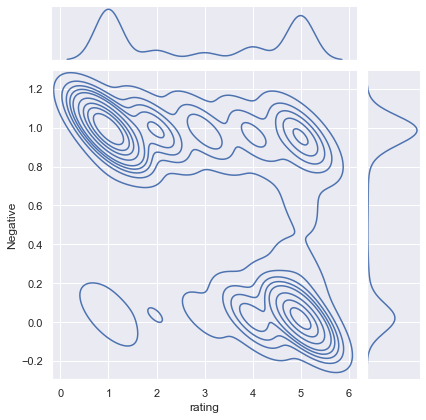

In [189]:
# selecting rating and negative 
df_rating_negativ = df[['rating', 'Negative']]
df_rating_negativ.head()

# create Seaborn contour plot
sns.set()
sns.jointplot(x='rating', y='Negative', data=df_rating_negativ, kind='kde')
plt.show()


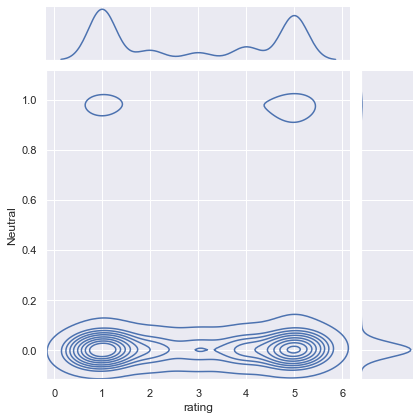

In [191]:
# selecting rating and neutral
df_rating_neutral = df[['rating', 'Neutral']]
df_rating_neutral.head()

# create Seaborn contour plot
sns.set()
sns.jointplot(x='rating', y='Neutral', data=df_rating_neutral, kind='kde')
plt.show()


In [213]:
print(df_rating_negativ)
print(df)

      rating  Negative
0          3  0.990329
1          2  0.989411
2          1  0.983143
3          1  0.990476
4          1  0.992667
...      ...       ...
9773       5  0.011936
9774       5  0.001026
9775       5  0.045537
9776       4  0.634547
9777       5  0.010333

[9778 rows x 2 columns]


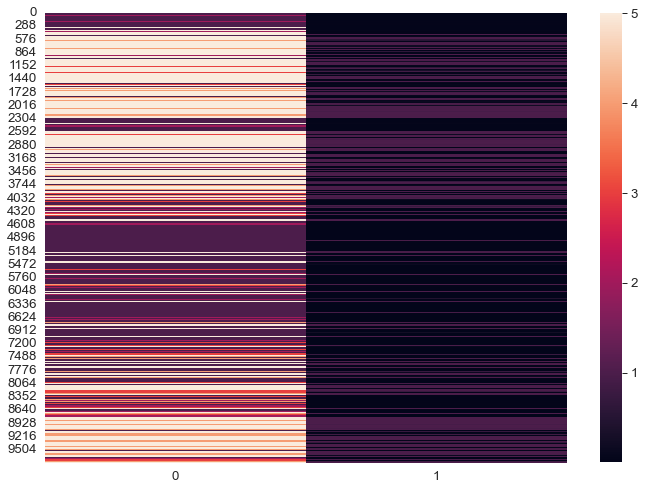

In [223]:
# selecting rating and positive
df_rating_positive = df[['rating', 'Positive']]
df_rating_positive.head()

# Create Seaborn contour plot
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
#sns.jointplot(x="rating", y="Positive", data=df_rating_positive, kind="kde", color="b")
sns.heatmap(data=df_rating_positive.values, cbar=True)
plt.show()


In [221]:
df_rating_positive.values

array([[3.        , 0.00949522],
       [2.        , 0.00975834],
       [1.        , 0.01672192],
       ...,
       [5.        , 0.9520385 ],
       [4.        , 0.27684104],
       [5.        , 0.9894059 ]])

In [193]:
# groupby rating and calculate mean
df_rating = df.groupby('rating').mean()
df_rating.head()


,index,lencontent,Positive,Negative,Neutral,year,month
rating,,,,,,,
1,2960.837362,191.367069,0.030478,0.941344,0.028178,2020.572004,5.201662
2,3409.859438,205.607764,0.055019,0.902752,0.042229,2019.879518,5.868809
3,3603.203180,176.137809,0.154251,0.794056,0.051692,2019.314488,6.406360
4,3487.430815,114.326791,0.549925,0.394256,0.055819,2019.014720,6.983317
5,2817.056131,63.559298,0.696169,0.255541,0.048290,2019.734312,7.047784


In [194]:
# pd.melt df_rating
df_rating = pd.melt(df_rating.reset_index(), id_vars=['rating'], value_vars=['Positive', 'Negative', 'Neutral'])
df_rating.head()


,rating,variable,value
0,1,Positive,0.030478
1,2,Positive,0.055019
2,3,Positive,0.154251
3,4,Positive,0.549925
4,5,Positive,0.696169


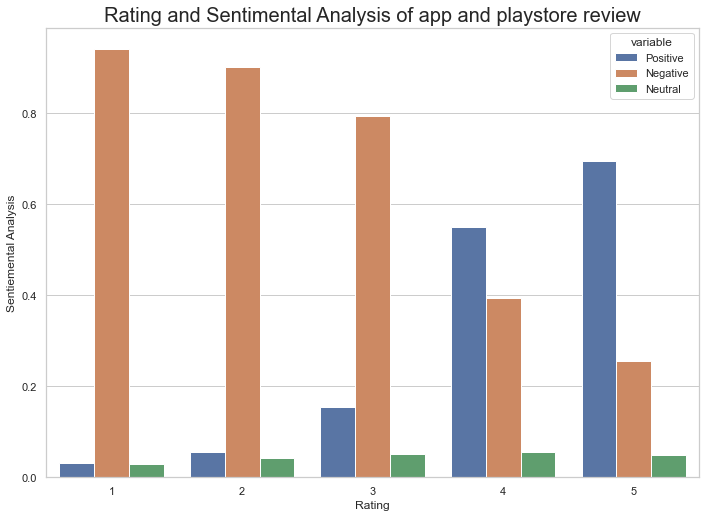

In [195]:
# create barplot visualisation with binning
sns.set(style="whitegrid")

ax = sns.barplot(x="rating", y="value", hue="variable", data=df_rating)
# title
plt.title('Rating and Sentimental Analysis of app and playstore review', fontsize=20)
# x-axis
plt.xlabel('Rating')
# y-axis
plt.ylabel('Sentiemental Analysis')
plt.show()



In [196]:
# groupyby year and month and calculate mean of positive, negativ and neutral
df = df.groupby(['year', 'month']).mean()
df.head()

index    rating  lencontent  Positive  Negative   Neutral
year month                                                            
2011 10     7267.5  4.750000   49.250000  0.804313  0.172861  0.022827
     11     7249.0  4.242424   68.363636  0.618625  0.284755  0.096620
     12     7228.0  3.666667   80.222222  0.652019  0.240283  0.107698
2012 1      7222.5  4.500000   84.000000  0.499592  0.500328  0.000080
     2      7221.0  1.000000  203.000000  0.000556  0.999433  0.000011

In [198]:
# combine year and month to one coloumn
df['year_month'] = df.index.map('{0[0]}-{0[1]:02}'.format)
df.head()

index    rating  lencontent  Positive  Negative   Neutral  \
year month                                                               
2011 10     7267.5  4.750000   49.250000  0.804313  0.172861  0.022827   
     11     7249.0  4.242424   68.363636  0.618625  0.284755  0.096620   
     12     7228.0  3.666667   80.222222  0.652019  0.240283  0.107698   
2012 1      7222.5  4.500000   84.000000  0.499592  0.500328  0.000080   
     2      7221.0  1.000000  203.000000  0.000556  0.999433  0.000011   

           year_month  
year month             
2011 10       2011-10  
     11       2011-11  
     12       2011-12  
2012 1        2012-01  
     2        2012-02

In [199]:
# reshape dataframe with pd.melt
df = pd.melt(df, id_vars=['year_month'], value_vars=['Positive', 'Negative', 'Neutral', 'rating'])
df.head()



,year_month,variable,value
0,2011-10,Positive,0.804313
1,2011-11,Positive,0.618625
2,2011-12,Positive,0.652019
3,2012-01,Positive,0.499592
4,2012-02,Positive,0.000556


In [200]:
# change year_month to datetime
df['year_month'] = pd.to_datetime(df['year_month'])
df.head()


,year_month,variable,value
0,2011-10-01,Positive,0.804313
1,2011-11-01,Positive,0.618625
2,2011-12-01,Positive,0.652019
3,2012-01-01,Positive,0.499592
4,2012-02-01,Positive,0.000556


C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_16588\3832336345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['moving_average'] = df_rating['value'].rolling(window=12).mean()


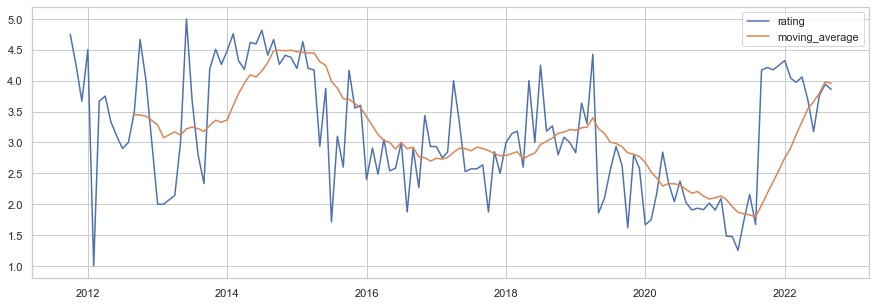

In [201]:
# filter for rating
df_rating = df[df['variable'] == 'rating']

# create moving average for rating
df_rating['moving_average'] = df_rating['value'].rolling(window=12).mean()
df_rating.head()

# visualize rating
plt.figure(figsize=(15, 5))
plt.plot(df_rating['year_month'], df_rating['value'], label='rating')
plt.plot(df_rating['year_month'], df_rating['moving_average'], label='moving_average')
plt.legend()
plt.show()






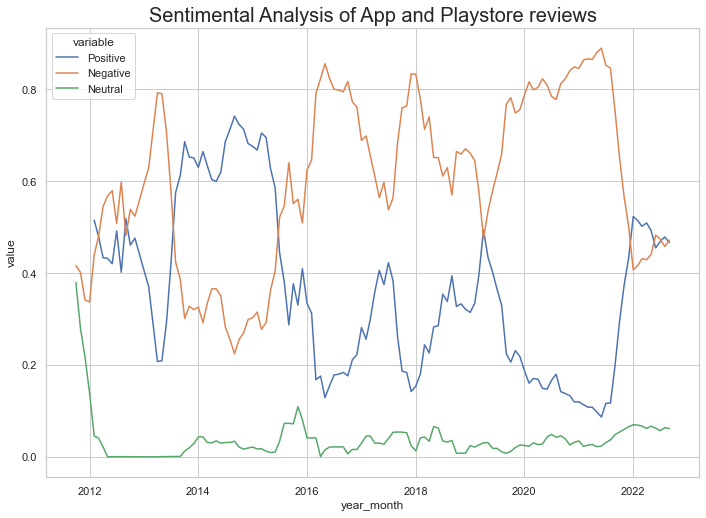

In [202]:
# filter for everything except rating
df = df[df['variable'] != 'rating']

# create moving average
df['value'] = df['value'].rolling(5).mean()
df.head()

# visualize sentiment
sns.lineplot(x='year_month', y='value', hue='variable', data=df)
# title
plt.title('Sentimental Analysis of App and Playstore reviews', fontsize=20)
plt.show()


In [203]:
# filter negative sentiment
df_negative = df[df['variable'] == 'Negative']
df_negative.head()

# create moving average

,year_month,variable,value
130,2011-10-01,Negative,0.416604
131,2011-11-01,Negative,0.401323
132,2011-12-01,Negative,0.341587
133,2012-01-01,Negative,0.337386
134,2012-02-01,Negative,0.439532


In [26]:
# splitting dataframe into train and test data
train, test = train_test_split(df, test_size=0.2, random_state=42)
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)


Train data shape:  (7822, 7)
Test data shape:  (1956, 7)


In [27]:
train_X = train[["Positive", "Negative", "Neutral"]]
train_y = train["rating"]

test_X = test[["Positive", "Negative", "Neutral"]]
test_y = test["rating"]

In [31]:
# Model Linear Regression
model = LinearRegression()
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)


Test score:  0.49489870071831354


In [32]:
# Model logistische Regression
model = LogisticRegression()
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)

Test score:  0.6579754601226994


In [35]:
# Train logistic regression model epoch 100
model = LogisticRegression(max_iter=10)
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)


Test score:  0.6579754601226994


c:\Users\Si Ben Tran\daw\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Logistic Regression with hyperparameter tuning
model = LogisticRegression(max_iter=100, C=0.1)
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)


Test score:  0.6569529652351738


In [34]:
# Ohter Logistic Regression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)


Test score:  0.656441717791411


In [37]:
# use different train split ratio
train, test = train_test_split(df, test_size=0.3, random_state=42)
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)



Train data shape:  (6844, 7)
Test data shape:  (2934, 7)
Test score:  0.6569529652351738


In [49]:
# using all different ratio for train and test data
train, test = train_test_split(df, train_size=0.8, random_state=42)
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)


Train data shape:  (7822, 7)
Test data shape:  (1956, 7)


In [50]:
# Logistic Regression with hyperparameter tuning
model = LogisticRegression(max_iter=100, C=0.1)
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)


Test score:  0.6569529652351738


In [51]:
# Multiple logistic regression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)


Test score:  0.656441717791411


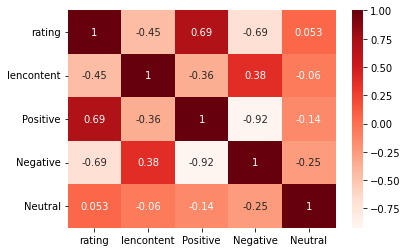

In [53]:
# create correlation plot
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


In [43]:
# read german_tweets_sentiment_analysis.csv
twitter_df = pd.read_csv("data/german_tweets_sentimental_analysed.csv")
twitter_df.head()


,date,content,language_prob,Positive,Negative,Neutral
0,2022-10-01 09:15:01+00:00,Habe diese Woche meine Fail-Kreditkarte bei @P...,de,0.044578,0.955002,0.000420
1,2022-09-30 19:56:59+00:00,@pbruegger @JuereVoBaern @twintapp @PostFinanc...,de,0.008653,0.983254,0.008093
2,2022-09-30 19:54:18+00:00,@WohlgensingerN @JuereVoBaern @twintapp @PostF...,de,0.006538,0.993362,0.000100
3,2022-09-30 19:45:11+00:00,@pbruegger @JuereVoBaern @twintapp @PostFinanc...,de,0.025193,0.974599,0.000208
4,2022-09-30 19:44:10+00:00,@pbruegger @twintapp @PostFinance Also sgkb Tw...,de,0.014871,0.969653,0.015477


In [44]:
Twitter_X = twitter_df[["Positive", "Negative", "Neutral"]]
Twitter_X

,Positive,Negative,Neutral
0,0.044578,0.955002,0.000420
1,0.008653,0.983254,0.008093
2,0.006538,0.993362,0.000100
3,0.025193,0.974599,0.000208
4,0.014871,0.969653,0.015477
...,...,...,...
6066,0.019020,0.980770,0.000210
6067,0.003521,0.996301,0.000177
6068,0.048990,0.933976,0.017034
6069,0.004724,0.977397,0.017880


<AxesSubplot:xlabel='predicted_twitter_rating', ylabel='count'>

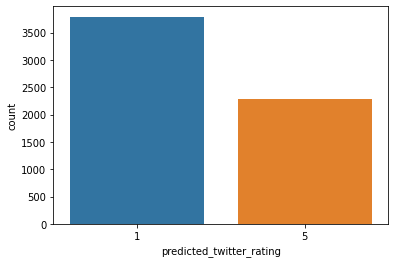

In [48]:
# predict tweets rating
twitter_pred = np.round(model.predict(Twitter_X))
twitter_pred

# add predicted rating to dataframe
twitter_df['predicted_twitter_rating'] = twitter_pred
twitter_df

# plot predicted rating
sns.countplot(x='predicted_twitter_rating', data=twitter_df)
